## Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

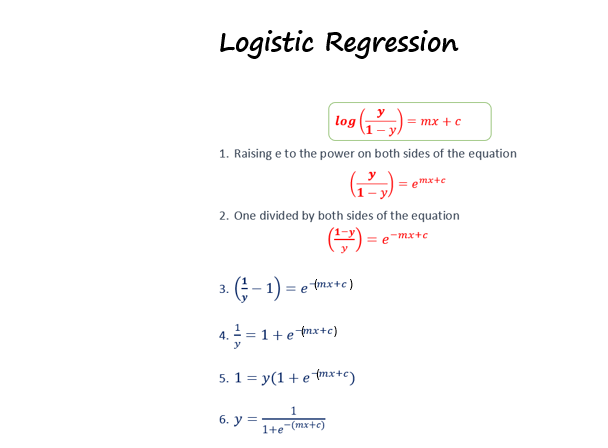

In [3]:
from IPython.display import Image
Image('log.jpeg')

In [4]:
df = pd.read_excel('shoe.xlsx')

In [5]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [6]:
df.rename(columns={'size(cm)': 'Shoe Size', 'class(y)': 'Gender'}, inplace=True)

In [7]:
df.head()

,Shoe Size,Gender
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


# Data Analysis

In [8]:
df.describe()

,Shoe Size
count,40.000000
mean,10.067375
std,0.532646
min,9.150000
25%,9.615000
50%,10.137500
75%,10.482500
max,11.050000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Shoe Size  40 non-null     float64
 1   Gender     40 non-null     object 
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes


In [10]:
df.isnull().sum()

Shoe Size    0
Gender       0
dtype: int64

In [11]:
df.dtypes

Shoe Size    float64
Gender        object
dtype: object

In [12]:
df.shape

(40, 2)

In [13]:
df.nunique()

Shoe Size    39
Gender        2
dtype: int64

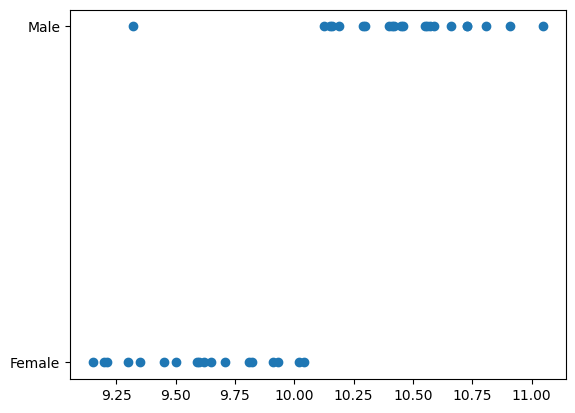

In [14]:
plt.scatter(df['Shoe Size'],df['Gender'])

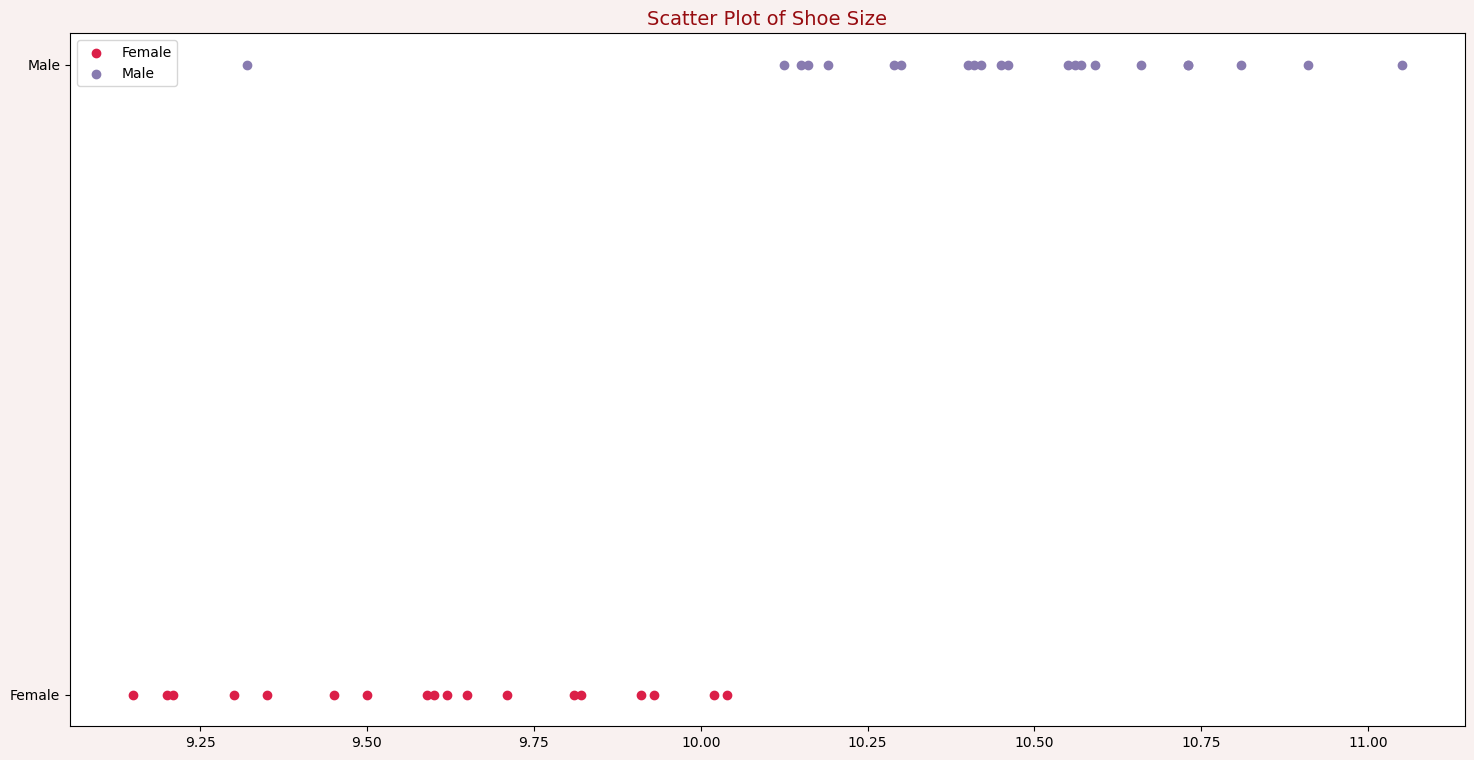

In [15]:
df0 = df[df['Gender'] == 'Female']
df1 = df[df['Gender'] == 'Male']

fig = plt.figure(figsize=(18, 9), facecolor='#F9F1F0')

plt.scatter(df0['Shoe Size'], df0['Gender'], color='#DB1F48', label='Female')
plt.scatter(df1['Shoe Size'], df1['Gender'], color='#887BB0', label='Male')
plt.title("Scatter Plot of Shoe Size", color="#970C10", fontsize=14)

plt.legend()
plt.show()

# Encode Using Replace Method

In [16]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])

In [17]:
df.head()

,Shoe Size,Gender
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


# Train & Test Data

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
xtrain,xtest,ytrain,ytest = tts(df[['Shoe Size']],df['Gender'],test_size=0.3,random_state=42)

In [20]:
xtrain.head()

,Shoe Size
13,10.91
31,9.91
34,10.16
8,9.71
17,9.93


In [21]:
ytrain.head()

13    1
31    0
34    1
8     0
17    0
Name: Gender, dtype: int64

In [22]:
xtrain.shape

(28, 1)

In [23]:
xtest.shape

(12, 1)

In [24]:
ytrain.shape

(28,)

In [25]:
ytest.shape

(12,)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
reg = LogisticRegression()

In [28]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [29]:
m = reg.coef_
m

array([[2.47463511]])

In [30]:
c = reg.intercept_
c

array([-24.90925884])

In [31]:
pred = reg.predict(xtest)
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [32]:
reg.predict_proba(xtest)

array([[0.21464894, 0.78535106],
       [0.52832341, 0.47167659],
       [0.16197908, 0.83802092],
       [0.36476622, 0.63523378],
       [0.08050842, 0.91949158],
       [0.42378052, 0.57621948],
       [0.22742863, 0.77257137],
       [0.13686847, 0.86313153],
       [0.86361669, 0.13638331],
       [0.82112044, 0.17887956],
       [0.27380062, 0.72619938],
       [0.7367278 , 0.2632722 ]])

In [33]:
ytest.head()

19    1
16    0
15    1
26    1
4     1
Name: Gender, dtype: int64

# Accuracy, MSE, MAE for Logistic Regression

In [34]:
Log_score = reg.score(xtest,ytest)
print("Logistic Accuracy:", Log_score)

Logistic Accuracy: 0.9166666666666666


In [35]:
mae1 = mean_absolute_error(ytest,pred)
print("Logistic MAE:", mae1)

Logistic MAE: 0.08333333333333333


In [36]:
mse1 = mean_squared_error(ytest,pred)
print("Logistic MSE:", mse1)

Logistic MSE: 0.08333333333333333


In [37]:
data = {'Variable':['Logistic MAE','Logistic MSE','Logistic Accuracy'],
         'Accuracy':[mae1,mse1,Log_score]}
df_after_pred = pd.DataFrame(data=data)

In [38]:
df_after_pred.head()

,Variable,Accuracy
0,Logistic MAE,0.083333
1,Logistic MSE,0.083333
2,Logistic Accuracy,0.916667


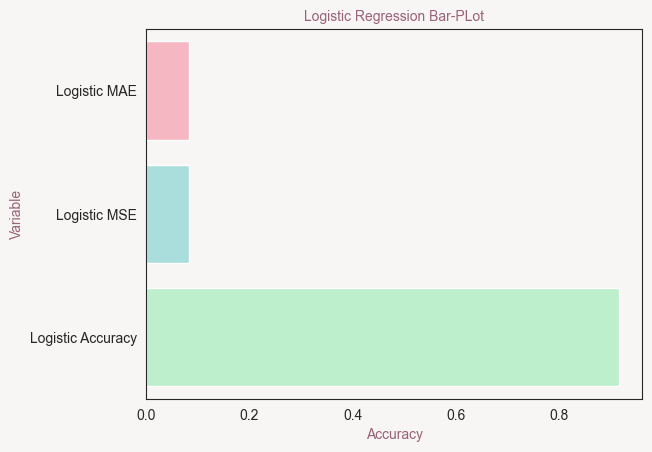

In [39]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#FFAEBC', '#A0E7E5', '#B4F8C8'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Accuracy', y='Variable', data=df_after_pred)

plt.title("Logistic Regression Bar-PLot", color="#99627A", fontsize=10)
ax.set_xlabel('Accuracy', color='#99627A', fontsize=10)
ax.set_ylabel('Variable', color='#99627A', fontsize=10)

plt.show()

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [41]:
dt = DecisionTreeClassifier()

In [42]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

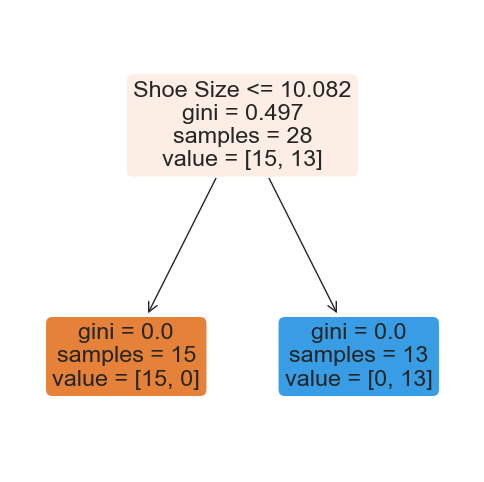

In [43]:
plt.figure(figsize=(6, 6))
tree.plot_tree(dt, filled=True, rounded=True, feature_names=df.columns)
plt.savefig('shoe_tree.png', dpi=1200)

In [44]:
dt_pred = dt.predict(xtest)
dt_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

# Accuracy, MSE, MAE for Decision Tree

In [45]:
dt_accuracy = accuracy_score(ytest, dt_pred)
print("DT Accuracy:", dt_accuracy)

DT Accuracy: 0.9166666666666666


In [46]:
dt_mse = mean_squared_error(ytest, dt_pred)
print("DT MSE:", dt_mse)

DT MSE: 0.08333333333333333


In [47]:
dt_mae = mean_absolute_error(ytest, dt_pred)
print("DT MAE:", dt_mae)

DT MAE: 0.08333333333333333


In [48]:
data = {'Variable':['Decision Tree MAE','Decision Tree MSE','Decision Tree Accuracy'],
         'Accuracy':[dt_mae,dt_mse,dt_accuracy]}
df_after_DT_pred = pd.DataFrame(data=data)

In [49]:
df_after_DT_pred.head()

,Variable,Accuracy
0,Decision Tree MAE,0.083333
1,Decision Tree MSE,0.083333
2,Decision Tree Accuracy,0.916667


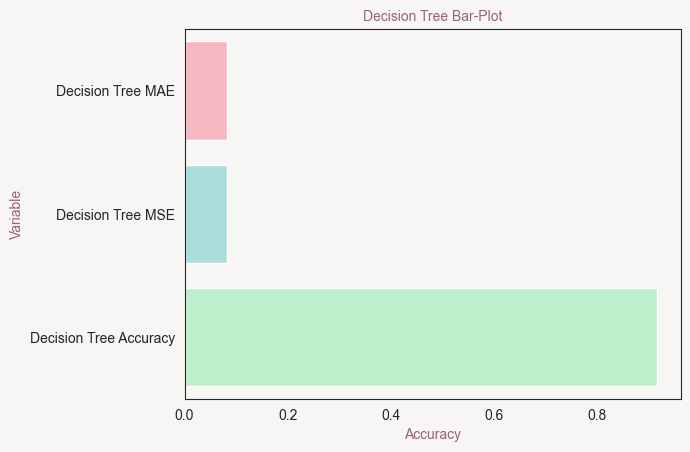

In [50]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#FFAEBC', '#A0E7E5', '#B4F8C8'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Accuracy', y='Variable', data=df_after_DT_pred)

plt.title("Decision Tree Bar-Plot", color="#99627A", fontsize=10)
ax.set_xlabel('Accuracy', color='#99627A', fontsize=10)
ax.set_ylabel('Variable', color='#99627A', fontsize=10)

plt.show()

# KNN Classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
ne = KNeighborsClassifier()

In [53]:
ne.fit(xtrain,ytrain)

KNeighborsClassifier()

In [54]:
knn_pred = ne.predict(xtest)
knn_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

# Accuracy, MSE, MAE for KNN Classification

In [55]:
knn_accuracy = accuracy_score(ytest, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9166666666666666


In [56]:
knn_mse = mean_squared_error(ytest, knn_pred)
print("KNN MSE:", knn_mse)

KNN MSE: 0.08333333333333333


In [57]:
knn_mae = mean_absolute_error(ytest, knn_pred)
print("KNN MAE:", knn_mae)

KNN MAE: 0.08333333333333333


In [58]:
data = {'Variable':['KNN MAE','KNN MSE','KNN Accuracy'],
         'Accuracy':[knn_mae,knn_mse,knn_accuracy]}
df_after_KNN_pred = pd.DataFrame(data=data)

In [59]:
df_after_KNN_pred.head()

,Variable,Accuracy
0,KNN MAE,0.083333
1,KNN MSE,0.083333
2,KNN Accuracy,0.916667


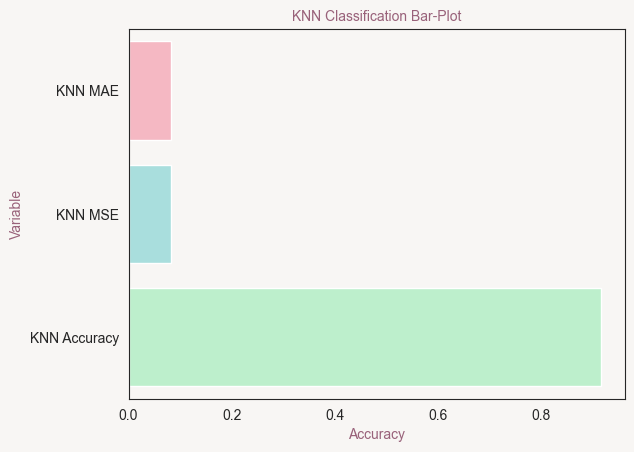

In [60]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#FFAEBC', '#A0E7E5', '#B4F8C8'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Accuracy', y='Variable', data=df_after_KNN_pred)

plt.title("KNN Classification Bar-Plot", color="#99627A", fontsize=10)
ax.set_xlabel('Accuracy', color='#99627A', fontsize=10)
ax.set_ylabel('Variable', color='#99627A', fontsize=10)

plt.show()

# Compare : Logistic Regression Vs Decision Tree Vs KNN Classification

In [61]:
logistic_data = {'Variable': ['Logistic Regression MAE', 'Logistic Regression MSE', 'Logistic Regression Accuracy'],
                 'Accuracy': [mae1, mse1, Log_score]}
df_after_pred = pd.DataFrame(data=logistic_data)


dt_data = {'Variable': ['Decision Tree MAE', 'Decision Tree MSE', 'Decision Tree Accuracy'],
           'Accuracy': [dt_mae, dt_mse, dt_accuracy]}
df_after_DT_pred = pd.DataFrame(data=dt_data)


knn_data = {'Variable': ['KNN Classification MAE', 'KNN Classification MSE', 'KNN Classification Accuracy'],
            'Accuracy': [knn_mae, knn_mse, knn_accuracy]}
df_after_KNN_pred = pd.DataFrame(data=knn_data)


result_df = pd.concat([df_after_pred, df_after_DT_pred, df_after_KNN_pred], axis=0)
result_df

,Variable,Accuracy
0,Logistic Regression MAE,0.083333
1,Logistic Regression MSE,0.083333
2,Logistic Regression Accuracy,0.916667
0,Decision Tree MAE,0.083333
1,Decision Tree MSE,0.083333
2,Decision Tree Accuracy,0.916667
0,KNN Classification MAE,0.083333
1,KNN Classification MSE,0.083333
2,KNN Classification Accuracy,0.916667


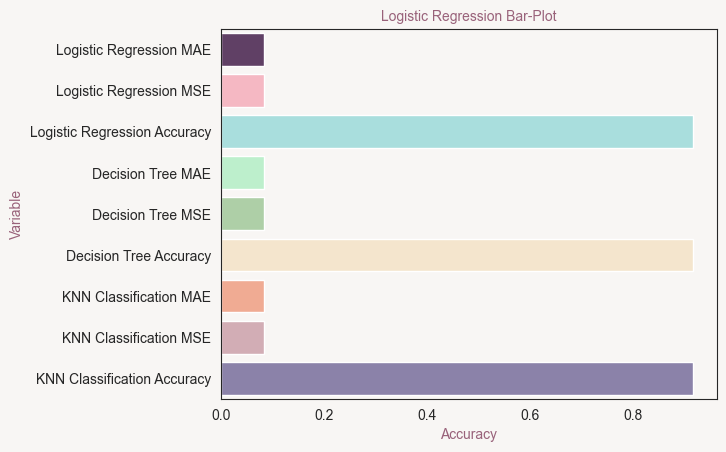

In [62]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#643A6B', '#FFAEBC', '#A0E7E5', '#B4F8C8', '#AAD6A0', '#FBE7C6', '#FFA384', '#D8A7B1', '#887BB0', '#41729F'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Accuracy', y='Variable', data=result_df)

plt.title("Logistic Regression Bar-Plot", color="#99627A", fontsize=10)
ax.set_xlabel('Accuracy', color='#99627A', fontsize=10)
ax.set_ylabel('Variable', color='#99627A', fontsize=10)

plt.show()

In [63]:
#The End